# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

Bima Putra Wicaksono

2141720255_TI-3E_06

Kuis 1 Machine Learning

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

# Unduh Data

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import fetch_openml

Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


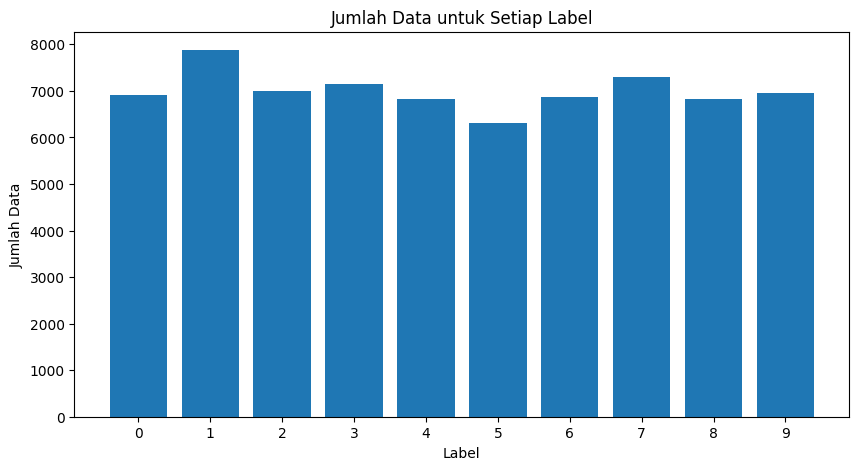

In [5]:
# Mengambil label dan fitur dari dataset (asumsi Anda telah memuat dataset MNIST sebelumnya)
X = mnist.data
y = mnist.target

# Menghitung jumlah data untuk setiap label
label_counts = np.bincount(y)

# Menampilkan jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data")

# Membuat diagram batang

plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data untuk Setiap Label')
plt.show()

Terdapat data imbalance karena terlihat dari jumlah data dari masing-masing label berbeda jumlahnya.

Data imbalance juga dapat terlihat melalui presentase

In [6]:
# total data
total_data = len(y)

# Menampilkan presentase jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    percentage = (count / total_data) * 100
    print(f"Label {label}: {count} data ({percentage:.2f}%) dari total")

Label 0: 6903 data (9.86%) dari total
Label 1: 7877 data (11.25%) dari total
Label 2: 6990 data (9.99%) dari total
Label 3: 7141 data (10.20%) dari total
Label 4: 6824 data (9.75%) dari total
Label 5: 6313 data (9.02%) dari total
Label 6: 6876 data (9.82%) dari total
Label 7: 7293 data (10.42%) dari total
Label 8: 6825 data (9.75%) dari total
Label 9: 6958 data (9.94%) dari total


2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.



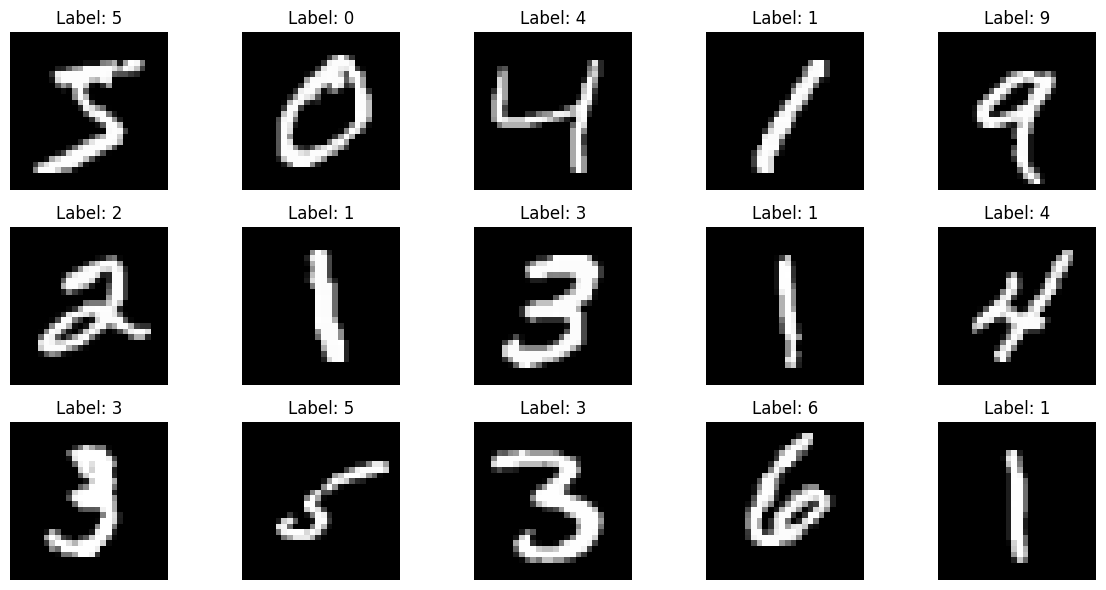

In [7]:
# Mengonversi data citra dari dataframe ke bentuk matriks
X = X.values.astype("float32")
y = y.values.astype("int")

# Menampilkan 15 citra pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.


In [8]:
# Normalisasi nilai piksel (0-255) menjadi rentang (0-1)
X /= 255.0

In [9]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk ekstraksi fitur
n_components = 50  # Jumlah komponen PCA yang akan diambil
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print("Shape of X_pca: ", X_pca.shape)

# Sekarang, X_pca berisi fitur-fitur yang diekstraksi menggunakan PCA

# Anda dapat menggunakan X_pca sebagai input untuk model klasifikasi Anda.


Shape of X_pca:  (70000, 50)


4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.



**Rasio 80:20**

In [10]:
from sklearn.model_selection import train_test_split

# Normalisasi nilai piksel (0-255) menjadi rentang (0-1)
# X /= 255.0

# Pemisahan data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Rasio 80:20")
print("Data Training:", X_train.shape, y_train.shape)
print("Data Testing:", X_test.shape, y_test.shape)


Rasio 80:20
Data Training: (56000, 784) (56000,)
Data Testing: (14000, 784) (14000,)


5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.



In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [12]:
# Membuat model Naive Bayes
nb_classifier = GaussianNB()
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)


6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")


In [14]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.5523571428571429 = 55.24%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      5560
           1       0.80      0.94      0.87      6277
           2       0.87      0.30      0.45      5610
           3       0.76      0.34      0.47      5708
           4       0.84      0.13      0.22      5529
           5       0.59      0.04      0.07      5040
           6       0.62      0.95      0.75      5480
           7       0.91      0.29      0.44      5790
           8       0.29      0.60      0.39      5468
           9       0.37      0.95      0.53      5538

    accuracy                           0.55     56000
   macro avg       0.68      0.55      0.50     56000
weighted avg       0.68      0.55      0.51     56000

Naive Bayes (Training) Confusion Matrix:
[[5079    8   29   18    6   12  167    2  136  103]
 [   2 5906   15   25    3    9   86    


7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.



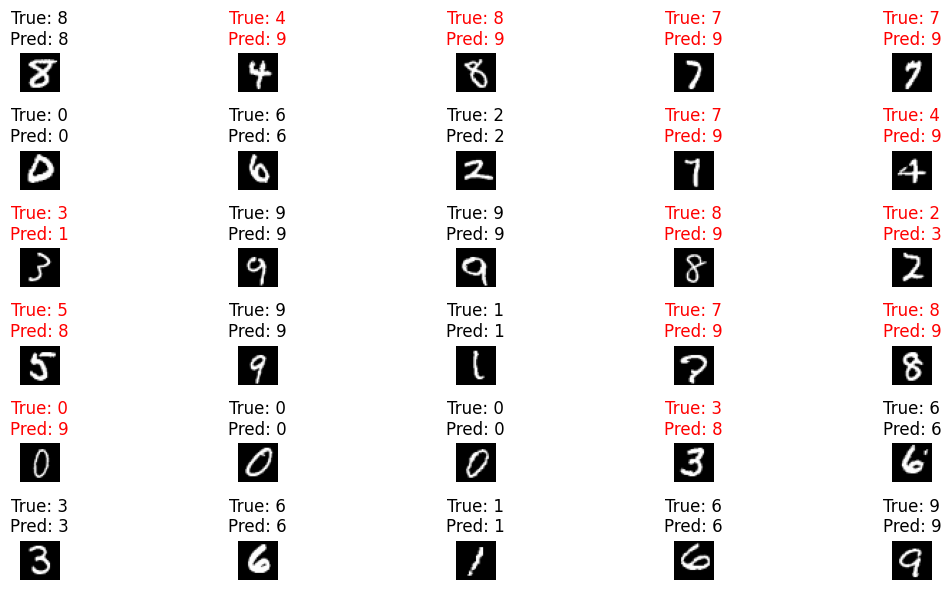

In [15]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
# X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()


klarifikasi dengan SVM

In [16]:
from sklearn.svm import SVC

# Inisialisasi model SVM dengan kernel linear dan parameter C serta gamma yang diatur
svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
# Melatih model pada data training
svm_classifier.fit(X_train, y_train)
# Melakukan prediksi pada data training dan testing
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

SVm, karena dari data yang dihasilkan memiliki akurasi paling tinggi. SVM kan kernelnya pake linier, jadi